# Take home exam 01

In [1]:
# Libraries
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import scienceplots
import sympy as sp

# Plot style
plt.style.use(['science', 'nature', 'high-vis'])

#### 4a) Show, by iterating two close initial conditions, that this map is chaotic.
$$
x_{n+1} = f (x_n) = (2x_n − 1)^3,\text{ for } x_n \in [−1, 1].
$$

In [ ]:
# Function
def map_4(x0, iter):
    """
    Computes the evolution of a initial condition.

    Parameters
    ----------
    x0 : float
        Initial condition.
    iter : int
        Number of iterations.

    Returns
    -------
    x : list
        Evolution.
    """

    # Initialize
    x = [x0]

    # Iterate
    for i in range(iter + 1):
        
        # Compute
        next = (2 * x[i] - 1)**3

        # Append
        x.append(next)

    return x
        

In [3]:
# Initial conditions
x0_array = np.linspace(0.999_999_999, 1, 10)

In [4]:
# Evolution and initial conditions
evolutions = []
initial_conditions = []

# Counter 
counter = 0

# Iterate over initial conditions
for x0 in x0_array:

    try:
        # Compute the map
        x = map_4(x0, 13)

        # Counter
        counter += 1

        # No infinite or NaN values
        if np.any(np.isinf(x)) or np.any(np.isnan(x)):
            continue

        # Append
        evolutions.append(x)
        initial_conditions.append(x0)

    except:
        print(f"Error with x0 = {x0}")
        continue

In [5]:
# Pick a valid pair
two_evolutions = evolutions[-3:-1]
two_initial_conditions = initial_conditions[-3:-1]

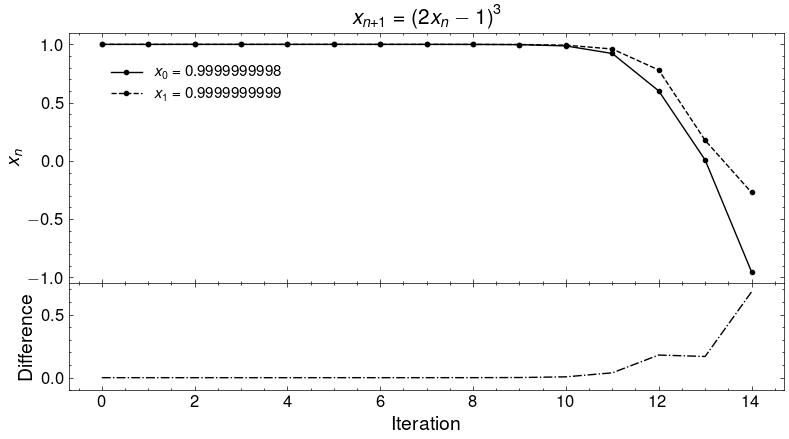

In [8]:
# Two panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4.5), sharex=True,
                               gridspec_kw={'hspace': 0, 'height_ratios': [7, 3]})

ax1.set_title(r"$x_{n+1}=\left(2x_n-1\right)^3$", fontsize=15)
ax1.set_ylabel(r"$x_n$", fontsize=14)

# Plots
ax1.plot(range(len(two_evolutions[0])), two_evolutions[0],
         label=r'$x_0=$' + f" {two_initial_conditions[0]:.10f}",
         marker='o', color='k')
ax1.plot(range(len(two_evolutions[1])), two_evolutions[1],
         label=r'$x_1=$' + f" {two_initial_conditions[1]:.10f}",
         marker='o', color='k', ls='--')

ax1.legend(loc=(0.05, 0.70), fontsize=11)
ax1.tick_params(axis='both', labelsize=12)

# Difference
difference = np.abs(np.array(two_evolutions[0]) - np.array(two_evolutions[1]))
ax2.plot(range(len(difference)), difference, color='k', ls = "-.")
ax2.set_xlabel("Iteration", fontsize=14)
ax2.set_ylabel("Difference", fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylim(-0.1, 0.75)

plt.tight_layout()
#plt.savefig("./plots/4a.pdf", bbox_inches='tight', dpi=200)
plt.subplots_adjust(hspace=0)
plt.show()

#### 5a) Bifurcation diagram of $x_n \in [-1,1]$ as a function of $r$.

$$
x_{n+1} = f(x_n) = \sin^2(r \arcsin(\sqrt{x_n})),\text{ for } r \in [1, 4].
$$

In [7]:
# Map
@jit(nopython=True)
def sine_map(x, r):
    return np.sin(r * np.arcsin(np.sqrt(x))) ** 2

In [112]:
def bifurcation(r_min=1.0, r_max=4.0, width=1000, height=1000, 
                transient=1000, numtoplot=100000, initial_x=0.25):
    
    # Create a 2D histogram
    hist = np.zeros((height, width), dtype = np.int32)
    
    # Calculate r values for each column
    r_values = np.linspace(r_min, r_max, width)
    
    print("---------------------------------------------------")
    print("Bifurcation diagram data...")
    print("---------------------------------------------------")

    # For each parameter value
    for i, r in enumerate(r_values):

        # Every 500 iterations
        if i % 500 == 0:
            print(f"Processing r = {r:.4f}, ({i}/{width})")
        
        # Initial condition
        x = initial_x
        
        # Run transient iterations
        for _ in range(transient):
            x = sine_map(x, r)
        
        # Record iterations after transient
        for _ in range(numtoplot):
            x = sine_map(x, r)
            
            # Map x to a row in the histogram
            if 0 <= x <= 1:  # Ensure x is in valid range
                row = int((1 - x) * (height - 1))
                hist[row, i] += 1

    # End
    print("---------------------------------------------------")
    print("Done!")
    print("---------------------------------------------------")
    
    return hist, r_values

In [176]:
625*2.5*2.5*2.5

9765.625

In [224]:
# Call (it was saved)
hist, r_values = bifurcation(
    r_min = 1.0, 
    r_max = 4.0, 
    width = 7000,
    height= 7000//4,
    transient = 500,#
    numtoplot = 7000
)

---------------------------------------------------
Bifurcation diagram data...
---------------------------------------------------
Processing r = 1.0000, (0/7000)
Processing r = 1.2143, (500/7000)
Processing r = 1.4286, (1000/7000)
Processing r = 1.6429, (1500/7000)
Processing r = 1.8573, (2000/7000)
Processing r = 2.0716, (2500/7000)
Processing r = 2.2859, (3000/7000)
Processing r = 2.5002, (3500/7000)
Processing r = 2.7145, (4000/7000)
Processing r = 2.9288, (4500/7000)
Processing r = 3.1432, (5000/7000)
Processing r = 3.3575, (5500/7000)
Processing r = 3.5718, (6000/7000)
Processing r = 3.7861, (6500/7000)
---------------------------------------------------
Done!
---------------------------------------------------


In [225]:
# Save data
# np.savetxt("./data/sinemap_tran1000_toplot10000_w30000.txt", hist, delimiter=",")

# Read data
# hist = np.loadtxt("./data/sinemap_tran1000_toplot10000_w30000.txt", delimiter=",")

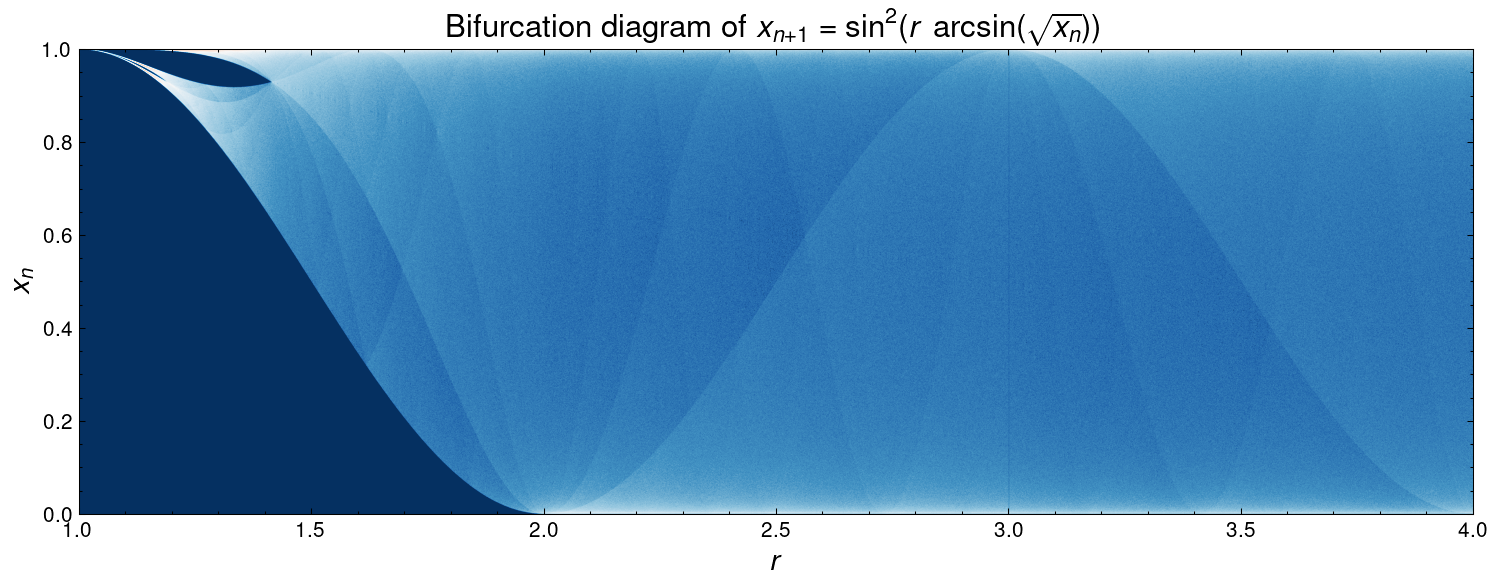

In [226]:
# Plot
plt.figure(figsize=(12, 4), dpi=150)

# Histogram
plt.imshow(np.log10(hist+1), cmap='RdBu_r', extent=[1.0, 4.0, 0.0, 1.0])

# Labels
plt.title("Bifurcation diagram of "+ r"$x_{n+1} = \sin^2(r\,\arcsin(\sqrt{x_n}))$", fontsize=15)
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$x_n$', fontsize=14)
plt.tick_params(axis='both', labelsize=10)

plt.tight_layout()
#plt.savefig("./plots/5a[1-4]-new.pdf", dpi=200, bbox_inches='tight')
plt.show()

#### 5b) Lyapunov exponent of the map in 5a.

In [3]:
# Analytical derivative
x, r = sp.symbols('x r')

# Function
map = sp.sin(r * sp.asin(sp.sqrt(x)))**2

# Derivative
map_prime = sp.diff(map, x)
map_prime = sp.simplify(map_prime)

# Print
map_prime

r*sin(2*r*asin(sqrt(x)))/(2*sqrt(x)*sqrt(1 - x))

In [4]:
@jit(nopython=True)
def derivative_map(x, r):

    eps = 1e-8
    
    return (r * np.sin(2 * r * np.arcsin(np.sqrt(x)))) / (2 * np.sqrt(x + eps) * np.sqrt(1-x+eps))

In [32]:
def lyapunov(r_min=1.0, r_max=4.0, partitions = 1000,
             transient=1000, nontransient=9000, initial_x=0.25):
    # Values for r
    r_values = np.linspace(r_min, r_max, partitions)

    # Initialize Lyapunov exponent
    log_list = np.zeros(nontransient)
    lyapunov_r = np.zeros(partitions)
    
    print("---------------------------------------------------")
    print("Calculating the Lyapunov exp...")
    print("---------------------------------------------------")

    # For each parameter value
    for i, r in enumerate(r_values):
        
        # Initial condition
        x = initial_x
        
        # Run transient iterations
        for _ in range(transient):
            x = sine_map(x, r)
        
        # Record iterations after transient
        for _ in range(nontransient):

            # Get the next value
            x = sine_map(x, r)

            # Compute the log of the derivative
            deriv = derivative_map(x, r)

            # Check
            log = np.log(abs(deriv + 0.0001))

            # Append to the list
            log_list[_] = log

        # Compute the Lyapunov exponent
        lyapunov_r[i] = np.mean(log_list)

    print("Done!")
    print("---------------------------------------------------")

    return lyapunov_r, r_values

In [33]:
# Call
lyapunov_r, r_values = lyapunov(
    r_min = 1.0, 
    r_max = 4.0, 
    partitions = 1000,
    transient = 1000,
    nontransient = 10000
)

---------------------------------------------------
Calculating the Lyapunov exp...
---------------------------------------------------
Done!
---------------------------------------------------


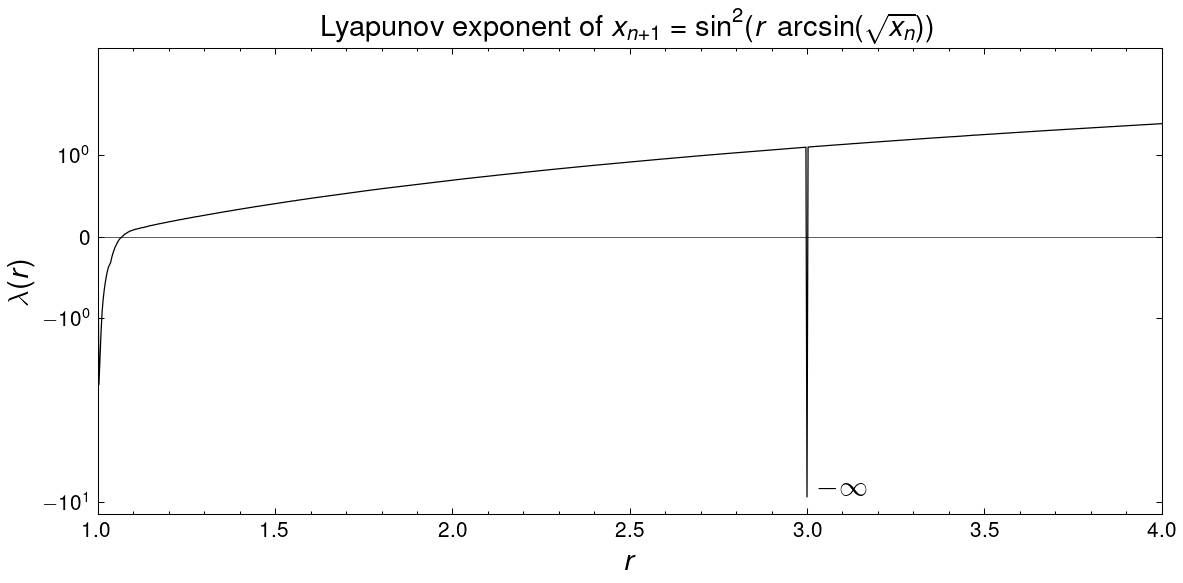

In [85]:
# plot
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(r_values, lyapunov_r, color='k', lw=0.6)
plt.axhline(0, color='k', ls='-', lw=0.3)
plt.title("Lyapunov exponent of " + r"$x_{n+1} = \sin^2(r\,\arcsin(\sqrt{x_n}))$", fontsize=14)
plt.text(3.03, -9, r"$-\infty$", fontsize=14, color='k')
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$\lambda(r)$', fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.yscale('symlog')
plt.xlim(1.0, 4.0)
plt.ylim(-12, 3)
#plt.grid(lw=0.3, ls='-.')
plt.savefig("./plots/5b[1-4].pdf", dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [11]:
# r-value with minimum Lyapunov exponent
min_lyapunov = np.min(lyapunov_r)
min_index = np.where(lyapunov_r == min_lyapunov)[0][0]
min_r = r_values[min_index]
print(f"r value with minimum Lyapunov exponent: {min_r:.4f}")

r value with minimum Lyapunov exponent: 3.0000


#### 6b) Plot the attractor for $a=0.6.$ Strange?


$$
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{z}
\end{bmatrix} = \begin{bmatrix}
y \\
z \\
-0.6z - y +|x|-1
\end{bmatrix}

In [2]:
# Libraries
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Define the slope
@jit(nopython=True)
def slope(t, S, a):

    # Get the state variables
    x, y, z = S

    # Define the equations
    dx_dt = y
    dy_dt = z
    dz_dt = -a * z - y + abs(x) - 1

    return [dx_dt, dy_dt, dz_dt]

In [4]:
# Parameters
a = 0.60
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
S0 = [0.1, 0.1, 0.1]

# Solve the system for each initial condition
sol = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(a,))

# Extract the solution
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]

In [5]:
# Now with a = 0.68
a2 = 0.68
sol2 = solve_ivp(slope, t_span, S0, t_eval=t_eval, method='RK45', args=(a2,))

# Extract the solution
x2 = sol2.y[0]
y2 = sol2.y[1]
z2 = sol2.y[2]

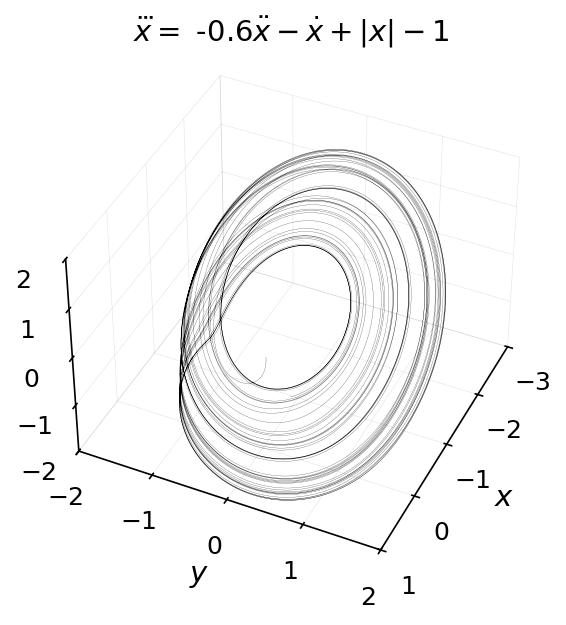

In [6]:
# Plot the results in 3D
fig = plt.figure(figsize=(4, 4), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.set_zlabel(r"$z$", fontsize=14)
ax.set_title(r"$\dddot{x} =$" + f" -{a}" + r"$\ddot{x} - \dot{x}+ |x|-1 $", fontsize=14)

# Edges
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.set_alpha(0.0)
ax.yaxis.pane.set_alpha(0.0)
ax.zaxis.pane.set_alpha(0.0)

# Grid
ax.xaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax.yaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax.zaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax.xaxis._axinfo["grid"]["linewidth"] = 0.3
ax.yaxis._axinfo["grid"]["linewidth"] = 0.3
ax.zaxis._axinfo["grid"]["linewidth"] = 0.3

# Limits
ax.set_xlim([-3, 1])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

ax.tick_params(axis='both', labelsize=12)

# Plot each solution
ax.plot(x, y, z, color='k', lw=0.1)

# Set the view angl
ax.view_init(elev=40, azim=25)
plt.tight_layout()
plt.show()

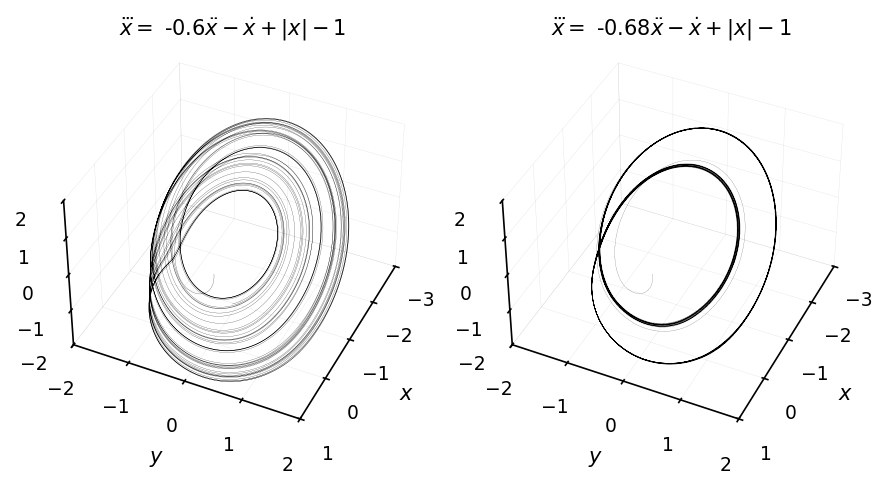

In [43]:
# Plot both a = 0.60 and a = 0.68 side by side in a 3D two panel plot
fig = plt.figure(figsize=(6, 3), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.set_xlabel(r"$x$", fontsize=10)
ax1.set_ylabel(r"$y$", fontsize=10)
#ax1.set_zlabel(r"$z$", fontsize=14)
ax2.set_xlabel(r"$x$", fontsize=10)
ax2.set_ylabel(r"$y$", fontsize=10)
#ax2.set_zlabel(r"$z$", fontsize=14)
ax1.set_title(r"$\dddot{x} =$" + f" -{a}" + r"$\ddot{x} - \dot{x}+ |x|-1 $", fontsize=10)
ax2.set_title(r"$\dddot{x} =$" + f" -{a2}" + r"$\ddot{x} - \dot{x}+ |x|-1 $", fontsize=10)
# Edges
ax1.xaxis.pane.set_edgecolor('black')
ax1.yaxis.pane.set_edgecolor('black')
ax1.zaxis.pane.set_edgecolor('black')
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.zaxis.pane.set_edgecolor('black')
ax1.xaxis.pane.set_alpha(0.0)
ax1.yaxis.pane.set_alpha(0.0)
ax1.zaxis.pane.set_alpha(0.0)
ax2.xaxis.pane.set_alpha(0.0)
ax2.yaxis.pane.set_alpha(0.0)
ax2.zaxis.pane.set_alpha(0.0)
# Grid
ax1.xaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax1.yaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax1.zaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax2.xaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax2.yaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax2.zaxis._axinfo["grid"]["color"] = (0, 0, 0, 0.1)
ax1.xaxis._axinfo["grid"]["linewidth"] = 0.2
ax1.yaxis._axinfo["grid"]["linewidth"] = 0.2
ax1.zaxis._axinfo["grid"]["linewidth"] = 0.2
ax2.xaxis._axinfo["grid"]["linewidth"] = 0.2
ax2.yaxis._axinfo["grid"]["linewidth"] = 0.2
ax2.zaxis._axinfo["grid"]["linewidth"] = 0.2
# Limits
ax1.set_xlim([-3, 1])
ax1.set_ylim([-2, 2])
ax1.set_zlim([-2, 2])
ax2.set_xlim([-3, 1])
ax2.set_ylim([-2, 2])
ax2.set_zlim([-2, 2])
ax1.tick_params(axis='both', labelsize=9)
ax2.tick_params(axis='both', labelsize=9)
# Plot each solution
ax1.plot(x, y, z, color='k', lw=0.1)
ax2.plot(x2, y2, z2, color='k', lw=0.1, ls = "--")
# Set the view angle
ax1.view_init(elev=40, azim=25)
ax2.view_init(elev=40, azim=25)

plt.tight_layout()
plt.savefig("6bc.pdf", dpi=300, bbox_inches='tight')
plt.show()

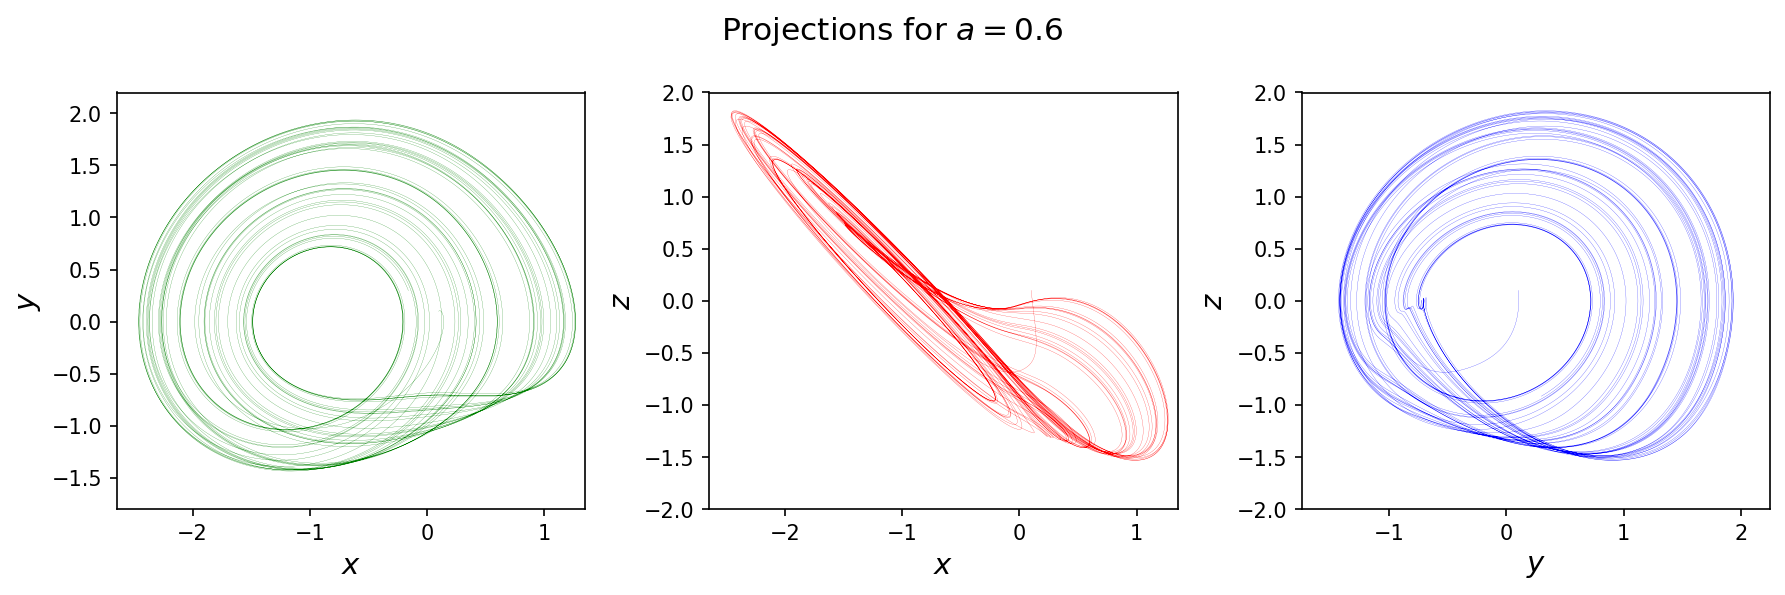

In [41]:
# Plot the xy, xz, and yz projections
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=150)

axs[0].plot(x, y, color='g', lw=0.1)
axs[0].set_xlabel(r"$x$", fontsize=14)
axs[0].set_ylabel(r"$y$", fontsize=14)
axs[0].set_xlim([-3+0.35, 1+0.35])
axs[0].set_ylim([-2 + 0.2, 2 + 0.2])

axs[1].plot(x, z, color='r', lw=0.1)
axs[1].set_xlabel(r"$x$", fontsize=14)
axs[1].set_ylabel(r"$z$", fontsize=14)
axs[1].set_xlim([-3 + 0.35, 1+0.35])
axs[1].set_ylim([-2, 2])

axs[2].plot(y, z, color='b', lw=0.1)
axs[2].set_xlabel(r"$y$", fontsize=14)
axs[2].set_ylabel(r"$z$", fontsize=14)
axs[2].set_xlim([-2+0.25, 2+0.25])
axs[2].set_ylim([-2, 2])

# Set the title
fig.suptitle(r"Projections for $a = 0.6$", fontsize=15)
# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("6b-projections.pdf", dpi=200, bbox_inches='tight')
plt.show()
